## Dataset 3: Car Insurance

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
insurance = pd.read_csv('gdrive/My Drive/insurance_data.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
insurance.shape
# insurance.columns

(1338, 7)

In [0]:
insurance.head(10)

,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,19,27.900,0,female,yes,southwest,16884.92400
1,18,33.770,1,male,no,southeast,1725.55230
2,28,33.000,3,male,no,southeast,4449.46200
3,33,22.705,0,male,no,northwest,21984.47061
4,32,28.880,0,male,no,northwest,3866.85520
5,31,25.740,0,female,no,southeast,3756.62160
6,46,33.440,1,female,no,southeast,8240.58960
7,37,27.740,3,female,no,northwest,7281.50560
8,37,29.830,2,male,no,northeast,6406.41070
9,60,25.840,0,female,no,northwest,28923.13692


In [0]:
insurance.select_dtypes(include = [object]).columns

Index(['ft4', 'ft5', 'ft6'], dtype='object')

**1. Feature Preprocessing**

> For each model,

> 1) Report the average training RMSE and average test RMSE for 10 fold cross validation.

> 2) Plot fitted values against true values as scatter plots using the whole dataset 3) Plot residuals versus fitted values as scatter plots using the whole dataset







(a) **Feature Encoding: **Use one-hot-encoding for the following 3 categorical features: ft4, ft5, ft6. Use the encoded features and the numerical features to fit a linear regression model.



In [0]:
# one-hot-encoding
# from sklearn.preprocessing import OneHotEncoder
# test = insurance.select_dtypes(include = [object])
# test
# enc = OneHotEncoder(categories='auto')
# enc.fit(test)
# print(enc.categories_)

In [0]:
# one-hot-encoding using pandas
ft0 = ['ft4', 'ft5', 'ft6']
categorical_columns = ft0
df_fe = pd.get_dummies(data = insurance, prefix = None, prefix_sep='_',\
                           columns = categorical_columns, drop_first=True)
df_fe.head(3)

,ft1,ft2,ft3,charges,ft4_male,ft5_yes,ft6_northwest,ft6_southeast,ft6_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [0]:
# fit linear regression model
y_fe = df_fe['charges']
X_fe = df_fe.drop(['charges'], axis = 1)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse_train_fe = np.zeros(10)
rmse_test_fe = np.zeros(10)
min_rmse_fe = float("inf")

def rmse(true, pred):
  rmse = np.sqrt(mean_squared_error(true, pred))
  return rmse

reg_fe_val = LinearRegression()

for fold, Index in enumerate(kf.split(X_fe)): 
  train_index, test_index = Index
  X_train, X_test = X_fe.loc[train_index], X_fe.loc[test_index]
  y_train, y_test = y_fe.loc[train_index], y_fe.loc[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  #print(y.loc[test_index])
  
  reg_fe_val.fit(X_train, y_train)
  
  y_pred_train = reg_fe_val.predict(X_train)
  y_pred_test = reg_fe_val.predict(X_test)
  
  rmse_train_fe[fold] = rmse(y_train, y_pred_train)
  rmse_test_fe[fold] = rmse(y_test, y_pred_test)
  
  if rmse_test_fe[fold] < min_rmse_fe:
    min_rmse_fe = rmse_test_fe[fold]
    best_reg_fe = reg_fe_val 

In [0]:
# result for 1 a
result_1a = pd.DataFrame(list(zip(X_fe.columns, best_reg_fe.coef_)), 
            columns = ['features', 'estimated coefficients'])

# # print(best_reg.intercept_)
# result_1a.append({'features': 'intercept', 'estimated coefficients': -11569.718571446963}, ignore_index=True)

print('average training RMSE:', np.mean(rmse_train_fe))
print('average test RMSE:', np.mean(rmse_test_fe))
print('Coefficients of the fold with the lowest RMSE of the test data: \n', result_1a)


average training RMSE: 6038.420878798441
average test RMSE: 6080.277989147752
Coefficients of the fold with the lowest RMSE of the test data: 
         features  estimated coefficients
0            ft1              254.363008
1            ft2              331.281449
2            ft3              460.575062
3       ft4_male             -145.015589
4        ft5_yes            23544.367491
5  ft6_northwest             -538.135016
6  ft6_southeast            -1007.822577
7  ft6_southwest            -1116.627139


In [0]:
reg_fe = LinearRegression()
reg_fe.fit(X_fe,y_fe)
y_pred_fe = reg_fe.predict(X_fe)

In [0]:
import matplotlib.pyplot as plt

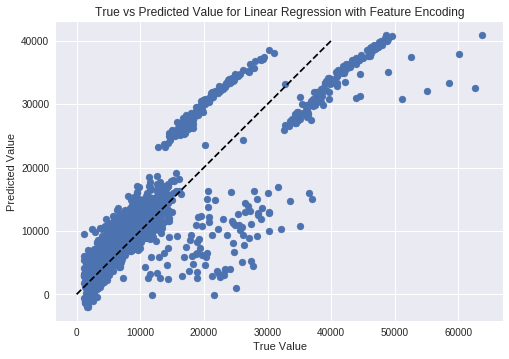

In [0]:
plt.scatter(y_fe,y_pred_fe)
plt.plot([0, 40000], [0, 40000], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value for Linear Regression with Feature Encoding')
plt.show()

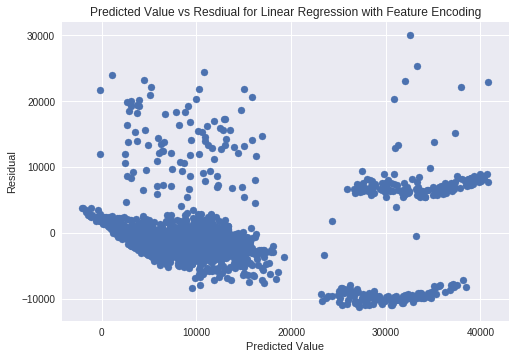

In [0]:
plt.scatter(y_pred_fe,y_fe-y_pred_fe)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted Value vs Resdiual for Linear Regression with Feature Encoding')
plt.show()

(b) **Standardization: **Standardize (see the Useful Functions Section) all these numerical features and keep the one-hot-encoded features. Fit a linear regression model.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
df_st = pd.get_dummies(data = insurance, prefix = None, prefix_sep='_',\
                           columns = categorical_columns, drop_first=True)
df_st.dtypes

ft1                int64
ft2              float64
ft3                int64
charges          float64
ft4_male           uint8
ft5_yes            uint8
ft6_northwest      uint8
ft6_southeast      uint8
ft6_southwest      uint8
dtype: object

In [0]:
df_st.head(5)

,ft1,ft2,ft3,charges,ft4_male,ft5_yes,ft6_northwest,ft6_southeast,ft6_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [0]:
y_st = df_st['charges']
X_st = df_st.drop(['charges'], axis = 1)

In [0]:
scaler = StandardScaler()
num_cols = ['ft1', 'ft2', 'ft3']

X_st[num_cols] = scaler.fit_transform(X_st[num_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_st.head(5)

,ft1,ft2,ft3,ft4_male,ft5_yes,ft6_northwest,ft6_southeast,ft6_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,1,0,0


In [0]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse_train_st = np.zeros(10)
rmse_test_st = np.zeros(10)
min_rmse_st = float("inf")

reg_st_val = LinearRegression()

for fold, Index in enumerate(kf.split(X_st)): 
  train_index, test_index = Index
  X_train, X_test = X_st.loc[train_index], X_st.loc[test_index]
  y_train, y_test = y_st.loc[train_index], y_st.loc[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  #print(y.loc[test_index])
  
  reg_st_val.fit(X_train, y_train)
  
  y_pred_train = reg_st_val.predict(X_train)
  y_pred_test = reg_st_val.predict(X_test)
  
  rmse_train_st[fold] = rmse(y_train, y_pred_train)
  rmse_test_st[fold] = rmse(y_test, y_pred_test)
  
  if rmse_test_st[fold] < min_rmse_st:
    min_rmse_st = rmse_test_st[fold]
    best_reg_st = reg_st_val 

In [0]:
# result for 1 b
result_1b = pd.DataFrame(list(zip(X_st.columns, best_reg_st.coef_)), 
            columns = ['features', 'estimated coefficients'])

# # print(best_reg.intercept_)
# result_1a.append({'features': 'intercept', 'estimated coefficients': -11569.718571446963}, ignore_index=True)

print('average training RMSE:', np.mean(rmse_train_st))
print('average test RMSE:', np.mean(rmse_test_st))
print('Coefficients of the fold with the lowest RMSE of the test data: \n', result_1b)

average training RMSE: 6038.420878798441
average test RMSE: 6080.277989147752
Coefficients of the fold with the lowest RMSE of the test data: 
         features  estimated coefficients
0            ft1             3572.454438
1            ft2             2019.461118
2            ft3              555.012373
3       ft4_male             -145.015589
4        ft5_yes            23544.367491
5  ft6_northwest             -538.135016
6  ft6_southeast            -1007.822577
7  ft6_southwest            -1116.627139


In [0]:
reg_st = LinearRegression()
reg_st.fit(X_st,y_st)
y_pred_st = reg_st.predict(X_st)

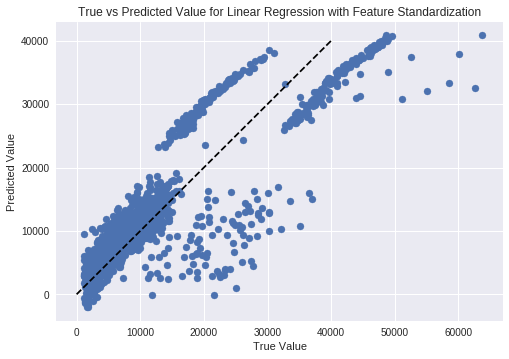

In [0]:
plt.scatter(y_st,y_pred_st)
plt.plot([0, 40000], [0, 40000], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value for Linear Regression with Feature Standardization')
plt.show()

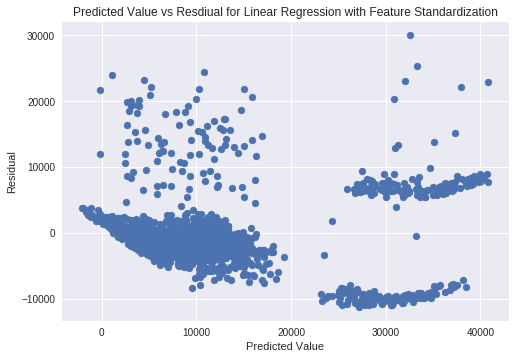

In [0]:
plt.scatter(y_pred_st,y_fe-y_pred_st)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted Value vs Resdiual for Linear Regression with Feature Standardization')
plt.show()

In [0]:
df_c = pd.get_dummies(data = insurance, prefix = None, prefix_sep='_',\
                           columns = categorical_columns, drop_first=True)
df_c.dtypes

ft1                int64
ft2              float64
ft3                int64
charges          float64
ft4_male           uint8
ft5_yes            uint8
ft6_northwest      uint8
ft6_southeast      uint8
ft6_southwest      uint8
dtype: object

In [0]:
df_c.head(10)

,ft1,ft2,ft3,charges,ft4_male,ft5_yes,ft6_northwest,ft6_southeast,ft6_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [0]:
def div_range(x):
  if x < 30:
    return 1
  elif x > 50:
    return 3
  return 2

df_c['ft1'] = df_c['ft1'].apply(div_range)
df_c.head(10)

,ft1,ft2,ft3,charges,ft4_male,ft5_yes,ft6_northwest,ft6_southeast,ft6_southwest
0,1,27.900,0,16884.92400,0,1,0,0,1
1,1,33.770,1,1725.55230,1,0,0,1,0
2,1,33.000,3,4449.46200,1,0,0,1,0
3,2,22.705,0,21984.47061,1,0,1,0,0
4,2,28.880,0,3866.85520,1,0,1,0,0
5,2,25.740,0,3756.62160,0,0,0,1,0
6,2,33.440,1,8240.58960,0,0,0,1,0
7,2,27.740,3,7281.50560,0,0,1,0,0
8,2,29.830,2,6406.41070,1,0,0,0,0
9,3,25.840,0,28923.13692,0,0,1,0,0


In [0]:
y_c = df_c['charges']
X_c = df_c.drop(['charges'], axis = 1)

In [0]:
scaler = StandardScaler()
num_cols = ['ft2', 'ft3']

X_c[num_cols] = scaler.fit_transform(X_c[num_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse_train_c = np.zeros(10)
rmse_test_c = np.zeros(10)
min_rmse_c = float("inf")

reg_c_val = LinearRegression()

for fold, Index in enumerate(kf.split(X_c)): 
  train_index, test_index = Index
  X_train, X_test = X_c.loc[train_index], X_c.loc[test_index]
  y_train, y_test = y_c.loc[train_index], y_c.loc[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  #print(y.loc[test_index])
  
  reg_c_val.fit(X_train, y_train)
  
  y_pred_train = reg_c_val.predict(X_train)
  y_pred_test = reg_c_val.predict(X_test)
  
  rmse_train_c[fold] = rmse(y_train, y_pred_train)
  rmse_test_c[fold] = rmse(y_test, y_pred_test)
  
  if rmse_test_c[fold] < min_rmse_c:
    min_rmse_c = rmse_test_c[fold]
    best_reg_c = reg_c_val 

In [0]:
# result for 1 c
result_1c = pd.DataFrame(list(zip(X_c.columns, best_reg_c.coef_)), 
            columns = ['features', 'estimated coefficients'])

# # print(best_reg.intercept_)
# result_1a.append({'features': 'intercept', 'estimated coefficients': -11569.718571446963}, ignore_index=True)

print('average training RMSE:', np.mean(rmse_train_c))
print('average test RMSE:', np.mean(rmse_test_c))
print('Coefficients of the fold with the lowest RMSE of the test data: \n', result_1c)

average training RMSE: 6197.168846934108
average test RMSE: 6235.399232033534
Coefficients of the fold with the lowest RMSE of the test data: 
         features  estimated coefficients
0            ft1             4353.525075
1            ft2             2029.035951
2            ft3              577.445266
3       ft4_male             -209.766269
4        ft5_yes            23537.205186
5  ft6_northwest             -525.908295
6  ft6_southeast            -1024.372982
7  ft6_southwest            -1115.878995


In [0]:
reg_c = LinearRegression()
reg_c.fit(X_c,y_c)
y_pred_c = reg_c.predict(X_c)

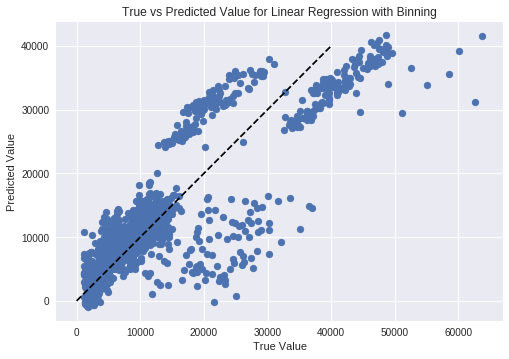

In [0]:
plt.scatter(y_c,y_pred_c)
plt.plot([0, 40000], [0, 40000], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value for Linear Regression with Binning')
plt.show()

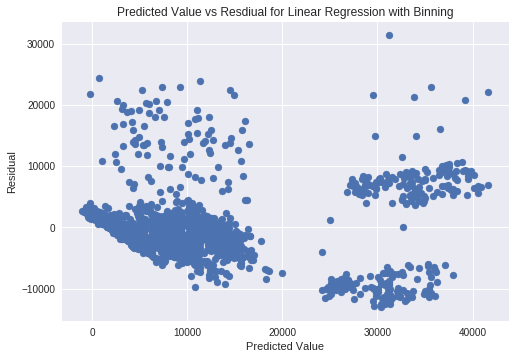

In [0]:
plt.scatter(y_pred_c,y_fe-y_pred_c)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted Value vs Resdiual for Linear Regression with Binning')
plt.show()

In [0]:
numerical = insurance.copy()
for c in ft0:
  numerical[c] = numerical[c].astype('category')
cat_columns = numerical.select_dtypes(['category']).columns
numerical[cat_columns] = numerical[cat_columns].apply(lambda x: x.cat.codes)


In [0]:
numerical.head(10)

,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,19,27.900,0,0,1,3,16884.92400
1,18,33.770,1,1,0,2,1725.55230
2,28,33.000,3,1,0,2,4449.46200
3,33,22.705,0,1,0,1,21984.47061
4,32,28.880,0,1,0,1,3866.85520
5,31,25.740,0,0,0,2,3756.62160
6,46,33.440,1,0,0,2,8240.58960
7,37,27.740,3,0,0,1,7281.50560
8,37,29.830,2,1,0,0,6406.41070
9,60,25.840,0,0,0,1,28923.13692


In [0]:
y_2 = numerical['charges']
X_2 = numerical.drop(['charges'], axis = 1)

In [0]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [0]:
f_vals = f_regression(X_2,y_2)
mutual_info = mutual_info_regression(X_2,y_2)

In [0]:
print(f_vals[0])
print(X_2.columns[np.argsort(f_vals[0])])
print(mutual_info)
print(X_2.columns[np.argsort(mutual_info)])

[1.31174013e+02 5.47093081e+01 6.20603705e+00 4.39970170e+00
 2.17761487e+03 5.14943381e-02]
Index(['ft6', 'ft4', 'ft3', 'ft2', 'ft1', 'ft5'], dtype='object')
[1.49946284 0.07306027 0.16106062 0.17665987 0.36917105 0.07630278]
Index(['ft2', 'ft6', 'ft3', 'ft4', 'ft5', 'ft1'], dtype='object')


In [0]:
def color_cat(x):
  return (x and 'blue') or 'red'

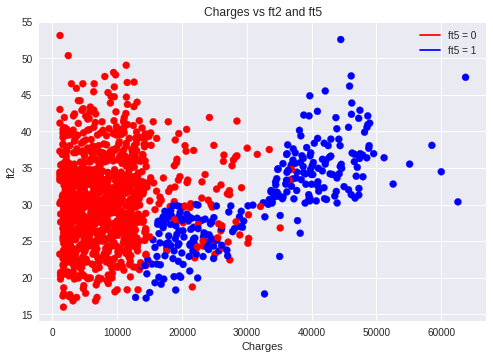

In [0]:
plt.scatter(numerical['charges'],numerical['ft2'],c=numerical['ft5'].apply(color_cat),label=None)
legend=[plt.plot([],color='red',label='ft5 = 0'),plt.plot([],color='blue',label='ft5 = 1')]
plt.legend()
plt.xlabel('Charges')
plt.ylabel('ft2')
plt.title('Charges vs ft2 and ft5')
plt.show()

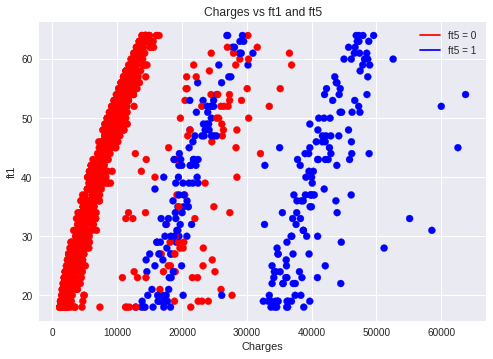

In [0]:
plt.scatter(numerical['charges'],numerical['ft1'],c=numerical['ft5'].apply(color_cat),label=None)
legend=[plt.plot([],color='red',label='ft5 = 0'),plt.plot([],color='blue',label='ft5 = 1')]
plt.legend()
plt.xlabel('Charges')
plt.ylabel('ft1')
plt.title('Charges vs ft1 and ft5')
plt.show()

**3. Modify the target variable**

In [0]:
# Pick one method of feature preprocessing from question1: 1a Feature Encoding
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse_train_log = np.zeros(10)
rmse_test_log = np.zeros(10)
min_rmse_log = float("inf")

def rmse(true, pred):
  rmse = np.sqrt(mean_squared_error(true, pred))
  return rmse

reg_log_val = LinearRegression()

for fold, Index in enumerate(kf.split(X_fe)): 
  train_index, test_index = Index
  X_train, X_test = X_fe.loc[train_index], X_fe.loc[test_index]
  y_train, y_test = y_fe.loc[train_index], y_fe.loc[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  #print(y.loc[test_index])
  
  reg_log_val.fit(X_train, np.log(y_train))
  
  y_pred_train = reg_log_val.predict(X_train)
  y_pred_test = reg_log_val.predict(X_test)
  
  rmse_train_log[fold] = rmse(y_train, np.exp(y_pred_train))
  rmse_test_log[fold] = rmse(y_test, np.exp(y_pred_test))
  
  if rmse_test_log[fold] < min_rmse_log:
    min_rmse_log = rmse_test_log[fold]
    best_reg_log = reg_log_val 

In [0]:
# result for 3 a
result_log = pd.DataFrame(list(zip(X_fe.columns, best_reg_log.coef_)), 
            columns = ['features', 'estimated coefficients'])

# # print(best_reg.intercept_)
# result_1a.append({'features': 'intercept', 'estimated coefficients': -11569.718571446963}, ignore_index=True)

print('average training RMSE:', np.mean(rmse_train_log))
print('average test RMSE:', np.mean(rmse_test_log))
print('Coefficients of the fold with the lowest RMSE of the test data: \n', result_log)

average training RMSE: 8362.054229244068
average test RMSE: 8410.455195596423
Coefficients of the fold with the lowest RMSE of the test data: 
         features  estimated coefficients
0            ft1                0.034557
1            ft2                0.012546
2            ft3                0.098753
3       ft4_male               -0.086465
4        ft5_yes                1.546307
5  ft6_northwest               -0.069727
6  ft6_southeast               -0.152443
7  ft6_southwest               -0.129751


In [0]:
reg_log = LinearRegression()
reg_log.fit(X_fe,np.log(y_fe))
y_pred_log = np.exp(reg_log.predict(X_fe))

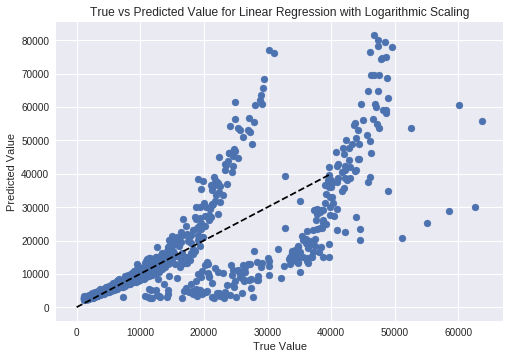

In [0]:
plt.scatter(y_fe,y_pred_log)
plt.plot([0, 40000], [0, 40000], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value for Linear Regression with Logarithmic Scaling')
plt.show()

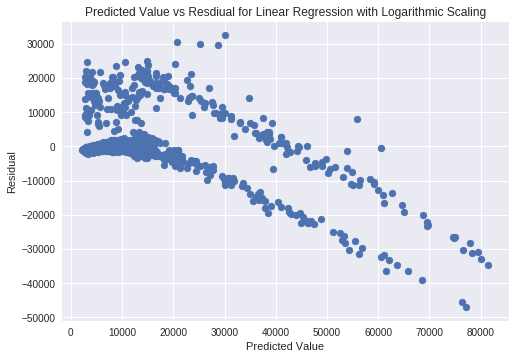

In [0]:
plt.scatter(y_pred_log,y_fe-y_pred_log)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted Value vs Resdiual for Linear Regression with Logarithmic Scaling')
plt.show()

In [0]:
f_vals_log = f_regression(X_2,np.log(y_2))
mutual_info_log = mutual_info_regression(X_2,np.log(y_2))

In [0]:
print(f_vals_log[0])
print(X_2.columns[np.argsort(f_vals_log[0])])
print(mutual_info_log)
print(X_2.columns[np.argsort(mutual_info_log)])

[5.15977081e+02 2.39364692e+01 3.57046705e+01 4.23764137e-02
 1.06212392e+03 2.43916473e+00]
Index(['ft4', 'ft6', 'ft2', 'ft3', 'ft1', 'ft5'], dtype='object')
[1.50291587 0.06776056 0.16101784 0.17628529 0.36939335 0.07753486]
Index(['ft2', 'ft6', 'ft3', 'ft4', 'ft5', 'ft1'], dtype='object')


In [0]:
poly = numerical.copy()
poly.head(10)

,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,19,27.900,0,0,1,3,16884.92400
1,18,33.770,1,1,0,2,1725.55230
2,28,33.000,3,1,0,2,4449.46200
3,33,22.705,0,1,0,1,21984.47061
4,32,28.880,0,1,0,1,3866.85520
5,31,25.740,0,0,0,2,3756.62160
6,46,33.440,1,0,0,2,8240.58960
7,37,27.740,3,0,0,1,7281.50560
8,37,29.830,2,1,0,0,6406.41070
9,60,25.840,0,0,0,1,28923.13692


In [0]:
#Add features
poly = poly.assign(ft7=(poly['ft2']*poly['ft5']))
poly = poly.assign(ft8=(poly['ft2']*(1-poly['ft5'])))
poly = poly.assign(ft9=(poly['ft1']*(poly['ft5'])))
poly = poly.assign(ft10=(poly['ft1']*(1-poly['ft5'])))
poly = poly.assign(ft11=(poly['ft1']*(poly['ft1'])))
poly = poly.assign(ft12=(poly['ft2'] < 30)*1)
poly = poly.assign(ft13=(poly['ft12']*poly['ft5']))
poly.head(10)

,ft1,ft2,ft3,ft4,ft5,ft6,charges,ft7,ft8,ft9,ft10,ft11,ft12,ft13
0,19,27.900,0,0,1,3,16884.92400,27.9,0.000,19,0,361,1,1
1,18,33.770,1,1,0,2,1725.55230,0.0,33.770,0,18,324,0,0
2,28,33.000,3,1,0,2,4449.46200,0.0,33.000,0,28,784,0,0
3,33,22.705,0,1,0,1,21984.47061,0.0,22.705,0,33,1089,1,0
4,32,28.880,0,1,0,1,3866.85520,0.0,28.880,0,32,1024,1,0
5,31,25.740,0,0,0,2,3756.62160,0.0,25.740,0,31,961,1,0
6,46,33.440,1,0,0,2,8240.58960,0.0,33.440,0,46,2116,0,0
7,37,27.740,3,0,0,1,7281.50560,0.0,27.740,0,37,1369,1,0
8,37,29.830,2,1,0,0,6406.41070,0.0,29.830,0,37,1369,1,0
9,60,25.840,0,0,0,1,28923.13692,0.0,25.840,0,60,3600,1,0


In [0]:
y_poly = poly['charges']
X_poly = poly.drop(['charges'], axis = 1)

In [0]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly,y_poly)
y_pred_poly = reg_poly.predict(X_poly)

In [0]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse_train_poly = np.zeros(10)
rmse_test_poly = np.zeros(10)
min_rmse_poly = float("inf")

reg_poly_val = LinearRegression()

for fold, Index in enumerate(kf.split(X_poly)): 
  train_index, test_index = Index
  X_train, X_test = X_poly.loc[train_index], X_poly.loc[test_index]
  y_train, y_test = y_poly.loc[train_index], y_poly.loc[test_index]
  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(len(train_index))
  #print(y.loc[test_index])
  
  reg_poly_val.fit(X_train, y_train)
  
  y_pred_train = reg_poly_val.predict(X_train)
  y_pred_test = reg_poly_val.predict(X_test)
  
  rmse_train_poly[fold] = rmse(y_train, y_pred_train)
  rmse_test_poly[fold] = rmse(y_test, y_pred_test)
  
  if rmse_test_poly[fold] < min_rmse_poly:
    min_rmse_poly = rmse_test_poly[fold]
    best_reg_poly = reg_poly_val 

In [0]:
# result for 1 c
result_poly = pd.DataFrame(list(zip(X_c.columns, best_reg_poly.coef_)), 
            columns = ['features', 'estimated coefficients'])

# # print(best_reg.intercept_)
# result_1a.append({'features': 'intercept', 'estimated coefficients': -11569.718571446963}, ignore_index=True)

print('average training RMSE:', np.mean(rmse_train_poly))
print('average test RMSE:', np.mean(rmse_test_poly))
print('Coefficients of the fold with the lowest RMSE of the test data: \n', result_poly)

average training RMSE: 4360.06563291946
average test RMSE: 4355.155704546069
Coefficients of the fold with the lowest RMSE of the test data: 
         features  estimated coefficients
0            ft1              -19.983464
1            ft2              176.121244
2            ft3              687.673982
3       ft4_male             -641.621543
4        ft5_yes            13443.295907
5  ft6_northwest             -430.737771
6  ft6_southeast              368.513982
7  ft6_southwest             -192.392738


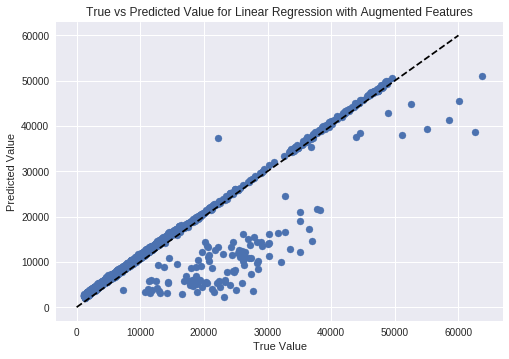

In [0]:
plt.scatter(y_poly,y_pred_poly)
plt.plot([0, 60000], [0, 60000], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value for Linear Regression with Augmented Features')
plt.show()

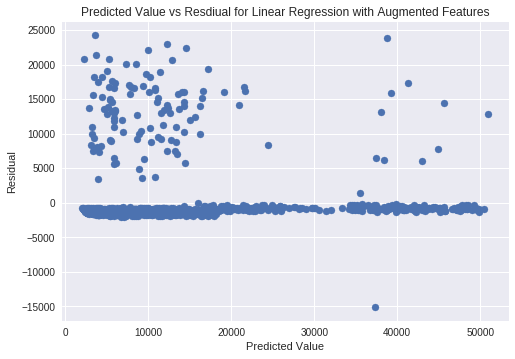

In [0]:
plt.scatter(y_pred_poly,y_poly-y_pred_poly)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted Value vs Resdiual for Linear Regression with Augmented Features')
plt.show()